# Murat Teksin  504211325

In [2]:
import numpy as np
from scipy.io.matlab import loadmat
from scipy.optimize import linear_sum_assignment

In [3]:
salinas = loadmat('data/Salinas_corrected.mat')['salinas_corrected']
salinas.shape

(512, 217, 204)

In [4]:
salinas_gt = loadmat('data/Salinas_gt.mat')['salinas_gt']
salinas_gt.shape

(512, 217)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import time

 # Reshaping and Splitting Data 

In [6]:
x = salinas.reshape((512*217,204))
y = salinas_gt.reshape(512*217)

In [7]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Supervised Algorithms

In [9]:
start=time.time()
LR_model = LinearRegression().fit(x_train,y_train)
LR_predicted = np.round(LR_model.predict(x_test))
end=time.time()
LR_time = (end-start)

In [10]:
LR_cm = confusion_matrix(y_test,LR_predicted)
ch_LR = chisquare(LR_cm,axis=None)

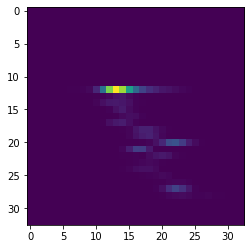

In [11]:
plt.imshow(LR_cm)

In [12]:
start=time.time()
LoR_model = LogisticRegression().fit(x_train,y_train)
LoR_predicted = LoR_model.predict(x_test)
end=time.time()
LoR_time = (end-start)

C:\Users\mteks\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
LoR_cm=confusion_matrix(y_test,LoR_predicted)
ch_LoR = chisquare(LoR_cm,axis=None)

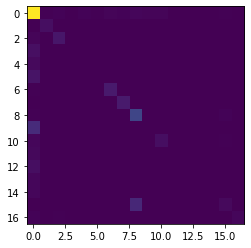

In [14]:
plt.imshow(LoR_cm)

In [15]:
start=time.time()

SVC_Model = SVC(C=12.0,
                kernel='poly',
                max_iter=100).fit(x_train,y_train)
SVC_Predict = SVC_Model.predict(x_test)
end=time.time()
SVC_time = (end-start)

C:\Users\mteks\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [16]:
SVC_cm = confusion_matrix(y_test,SVC_Predict)

In [17]:
ch_SVC = chisquare(SVC_cm,axis=None)

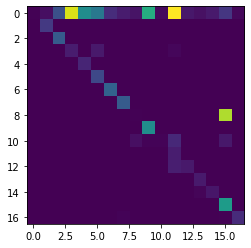

In [18]:
plt.imshow(SVC_cm)

In [19]:
start=time.time()
LSVC_model = LinearSVC(multi_class='ovr',max_iter=100).fit(x_train,y_train)
LSVC_predicted = LSVC_model.predict(x_test)
end=time.time()
LSVC_time = (end-start)

C:\Users\mteks\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
LSVC_cm = confusion_matrix(y_test,LSVC_predicted)

In [21]:
ch_LSVC = chisquare(LSVC_cm,axis=None)

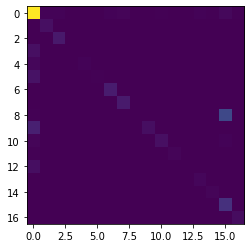

In [22]:
plt.imshow(LSVC_cm)

In [23]:
start=time.time()
KNN_Model = KNeighborsClassifier().fit(x_train,y_train)
KNN_Predict = KNN_Model.predict(x_test)
end=time.time()
KNN_time = (end-start)

In [24]:
KNN_cm = confusion_matrix(y_test,KNN_Predict)
ch_KNN = chisquare(KNN_cm,axis=None)

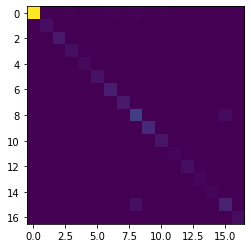

In [25]:
plt.imshow(KNN_cm)

In [26]:
compare_arr_sup = np.array([ch_LR[0],ch_LSVC[0],ch_SVC[0],ch_LoR[0],ch_KNN[0]])
time_arr_sup = np.array([LR_time,LoR_time,SVC_time,LSVC_time,KNN_time])

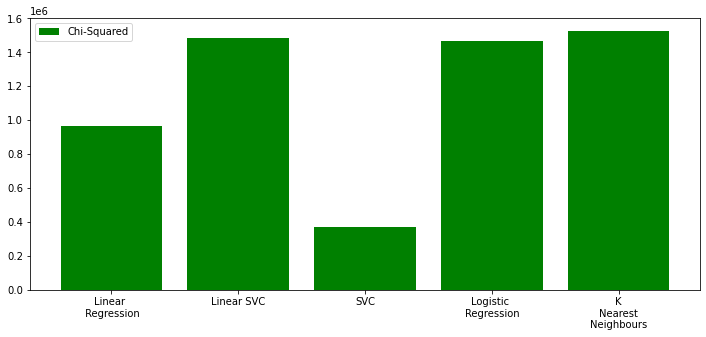

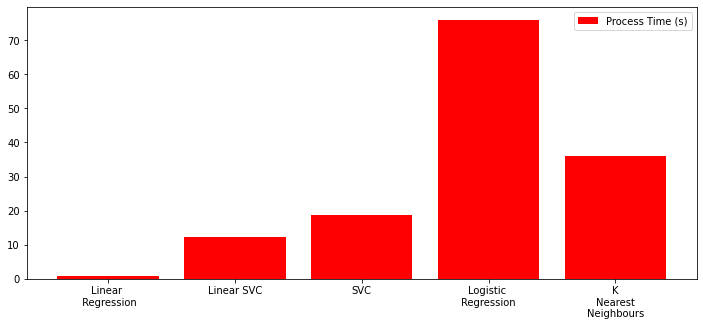

In [27]:
plt.figure(figsize=(12,5))
plt.bar(['Linear \n Regression','Linear SVC','SVC','Logistic \nRegression','K\nNearest\nNeighbours'],compare_arr_sup,color='g',label='Chi-Squared')
plt.legend()
plt.figure(figsize=(12,5))
plt.bar(['Linear \n Regression','Linear SVC','SVC','Logistic \nRegression','K\nNearest\nNeighbours'],time_arr_sup,color='r',label='Process Time (s)')
plt.legend()

# Unsupervised Models

In [28]:
classes = len(np.unique(y))

In [29]:
start=time.time()
KM_Model = KMeans(n_clusters=classes).fit(x)
KM_Predicted = KM_Model.predict(x)
end=time.time()
KM_time = (end-start)

In [30]:
KM_cm = confusion_matrix(y,KM_Predicted)
rows, cols = linear_sum_assignment(KM_cm,maximize=True)
KM_cm = KM_cm[rows,:]
KM_cm = KM_cm[:,cols]
ch_KM = chisquare(KM_cm,axis=None)

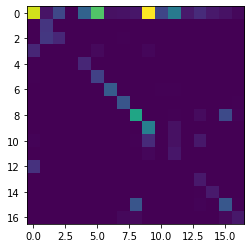

In [31]:
plt.imshow(KM_cm)

In [32]:
classes = len(np.unique(y))

In [37]:
h_train, h_test,hy_train,hy_test = train_test_split(x,y,test_size=0.5,random_state=42)
start=time.time()
H_predicted = AgglomerativeClustering(n_clusters=classes).fit_predict(h_train)
end=time.time()
H_time = (end-start)

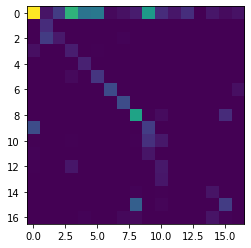

In [63]:
H_cm = confusion_matrix(hy_train,H_predicted)
rows, cols = linear_sum_assignment(H_cm,maximize=True)
H_cm = H_cm[rows,:]
H_cm = H_cm[:,cols]
ch_H = chisquare(H_cm,axis=None)
plt.imshow(H_cm)

In [40]:
start=time.time()
DB_Predicted = DBSCAN().fit_predict(x)
end=time.time()
DB_time = (end-start)

In [41]:
DB_cm = confusion_matrix(y,DB_Predicted)
rows, cols = linear_sum_assignment(DB_cm,maximize=True)
DB_cm = DB_cm[rows,:]
DB_cm = DB_cm[:,cols]

In [42]:
ch_DB = chisquare(DB_cm,axis=None)

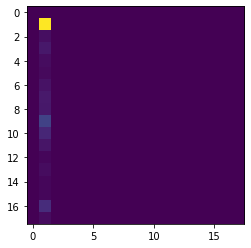

In [43]:
plt.imshow(DB_cm)

In [65]:
compare_arr_unsup = np.array([ch_KM[0],ch_H[0],ch_DB[0]])
times_unsup = np.array([KM_time,H_time,DB_time])

In [66]:
unsup_al = ['K_Means','Hierarcial','DB-scan']
x_ax = np.arange(len(unsup_al))

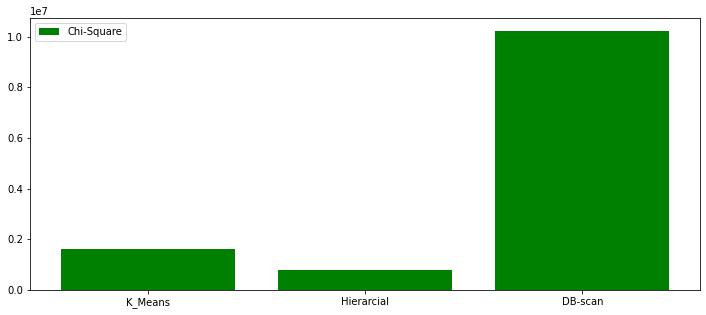

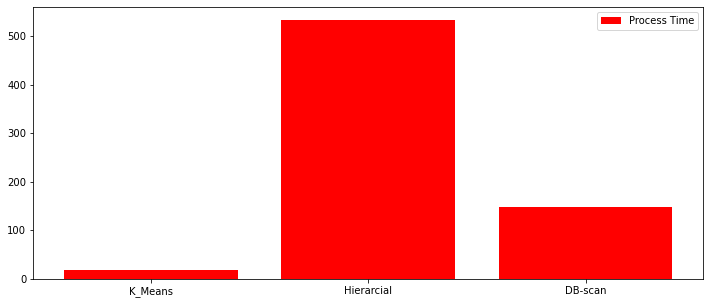

In [67]:
plt.figure(figsize=(12,5))
plt.bar(['K_Means','Hierarcial','DB-scan'],compare_arr_unsup,color='g',label='Chi-Square')
plt.legend()
plt.figure(figsize=(12,5))
plt.bar(['K_Means','Hierarcial','DB-scan'],times_unsup,color='r',label='Process Time')
plt.legend()

In [68]:
compare_merged = np.concatenate((compare_arr_sup,compare_arr_unsup))
compare_merged_time = np.concatenate((time_arr_sup,times_unsup))

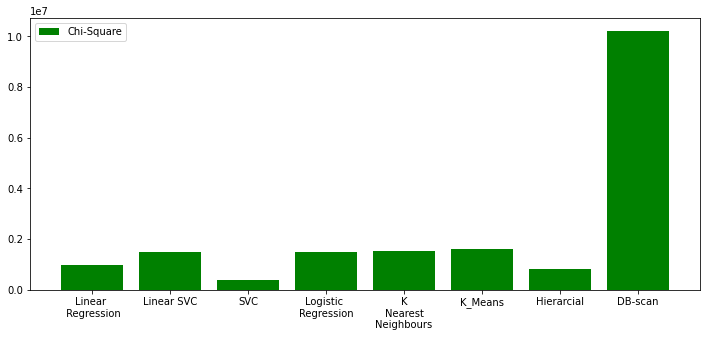

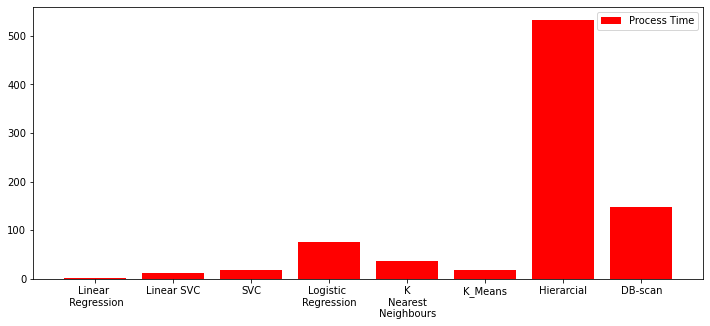

In [69]:
plt.figure(figsize=(12,5))
plt.bar(['Linear \n Regression','Linear SVC','SVC','Logistic \nRegression','K\nNearest\nNeighbours','K_Means','Hierarcial','DB-scan'],
        compare_merged,color='g',label='Chi-Square')
plt.legend()

plt.figure(figsize=(12,5))
plt.bar(['Linear \n Regression','Linear SVC','SVC','Logistic \nRegression','K\nNearest\nNeighbours','K_Means','Hierarcial','DB-scan'],
        compare_merged_time,color='r',label='Process Time')
plt.legend()